# Talon Lusk

## Exploratory Data Analysis 
### Research Question / Hypothesis:
For my research, I wanted to analyze how the choice of Film Type and the Format Shot on correlated to the budget of a Film and the choice of Genre. I plan to evaluate how these variables affect eachother independently in multiple comparisons. With the use of the Format Shot on, there are multiple Codecs and Film Sizes that could negatively/positively impact how the Movie is filmed. Some Digital Codecs might be cheaper to shoot with since they could take up less space than others. Further more, the quality of Codec could matter a lot when it comes to shooting a Drama Movie versus a fast paced Horror Movie. There is also the lingering question of the viability and efficiency of shooting on Film nowadays. Researching how the choice of Format and the Film Type correlate with different factors (Genre, Budget) can provide a great insight into Movie Production.

### Importing Data

In [1]:
from project_functions1 import *
df = pd.read_csv("../data/raw/top_movies.csv")
df_clean = load_and_process("../data/raw/top_movies.csv")

### Reviewing Initial Data
From the initial data set I grabbed, I wanted to look at both Top Directors and Top Movies. Between them, there were a lot of unneeded columns that were taking up space. Simple things like Director ID's and ID's of Movies were of no value when it came to starting to plot my data. As well I removed the Co-Directors since I wanted to minimize the amount of clutter in the Data Frame.

In [2]:
print(df.shape)
print(df.describe().apply(lambda s: s.apply(lambda x: format(x,'f'))))
print(df.columns)
df.head()

(1195, 10)
      production_year              id            budget
count     1195.000000     1195.000000       1195.000000
mean      2011.492887  3974297.446025   65826104.602510
std          3.434807   408547.436479   59738936.941028
min       2006.000000  3212915.000000          0.000000
25%       2008.500000  3634968.500000   22250000.000000
50%       2011.000000  4022548.000000   45000000.000000
75%       2014.000000  4361249.500000   90000000.000000
max       2017.000000  4607464.000000  378500000.000000
Index(['production_year', 'id', 'title', 'directors', 'genres',
       'camera_format', 'negative_format', 'budget', 'budget_source',
       'film_type'],
      dtype='object')


,production_year,id,title,directors,genres,camera_format,negative_format,budget,budget_source,film_type
0,2006,4103791,Pirates of the Caribbean: Dead Man's Chest,"Verbinski, Gore",Action|Adventure|Fantasy,"Arriflex 235, Panavision Primo Lenses|Panavisi...",35 mm,225000000,the-numbers,F
1,2006,4022547,Night at the Museum,"Levy, Shawn",Adventure|Comedy|Family|Fantasy,"Arriflex 435, Zeiss Ultra Prime and Angenieux ...",35 mm,110000000,the-numbers,F
2,2006,3415583,Cars,"Lasseter, John|Ranft, Joe",Animation|Comedy|Family|Sport,NaN,Digital,70000000,the-numbers,D
3,2006,4587958,X-Men: The Last Stand,"Ratner, Brett",Action|Adventure|Fantasy|Sci-Fi|Thriller,Panavision Cameras and Lenses,35 mm,210000000,the-numbers,F
4,2006,4351263,The Da Vinci Code,"Howard, Ron",Mystery|Thriller,"Arricam LT, Cooke S4 Lenses|Arricam ST, Cooke ...",35 mm,125000000,the-numbers,F


### Clean Data
After reviewing what I could do with Method Chaining, I had decided to keep the [Format, Year, Budget, Genre, Film Type], showing only necessary data. That brought it down from 10 columns to a number of 5. The rows had increased in size as I needed to split the multiple Film Types, Formats and Genres that could be inline. To do that, I created a new row and put them below to seperate them. Afterwards I removed any NaN rows that were in columns and made sure there were no duplicate rows that contained the same data. Lastly I made sure to sort the rows so they were in order of Year.

In [3]:
print(df_clean.shape)
print(df_clean.describe().apply(lambda s: s.apply(lambda x: format(x,'f'))))
print(df_clean.columns)
df_clean.head()

(5587, 5)
              year            budget
count  5587.000000       5587.000000
mean   2011.696438   82218325.577233
std       3.348778   67864133.877851
min    2006.000000          0.000000
25%    2009.000000   30000000.000000
50%    2012.000000   60000000.000000
75%    2015.000000  125000000.000000
max    2017.000000  378500000.000000
Index(['negative_format', 'year', 'budget', 'genres', 'film_type'], dtype='object')


,negative_format,year,budget,genres,film_type
0,35 mm,2006,225000000,Action,F
1,Video,2006,40000000,Action,F
2,Video,2006,40000000,Thriller,D
3,Video,2006,40000000,Drama,D
4,Video,2006,40000000,Adventure,D


In [4]:
df_clean.nunique(axis=0)

negative_format     35
year                12
budget             188
genres              22
film_type            3
dtype: int64

Now with the data cleaned, it's easier to get a view of what data there is to work with.

### Plotting Data

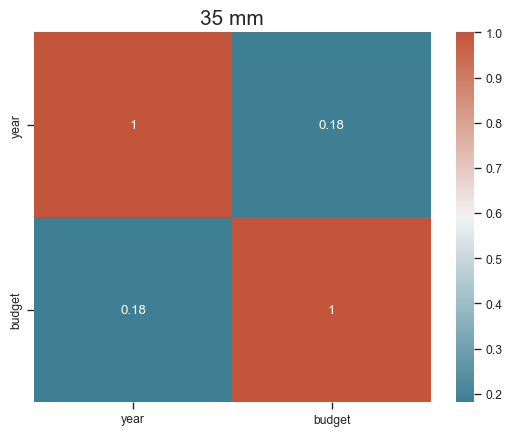

In [5]:
tx = df_clean.query("negative_format=='35 mm'") # Plotting the Graph
plt.title("35 mm", size=15)
tx=tx.corr()
g=sns.heatmap(tx, xticklabels=tx.columns, yticklabels=tx.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

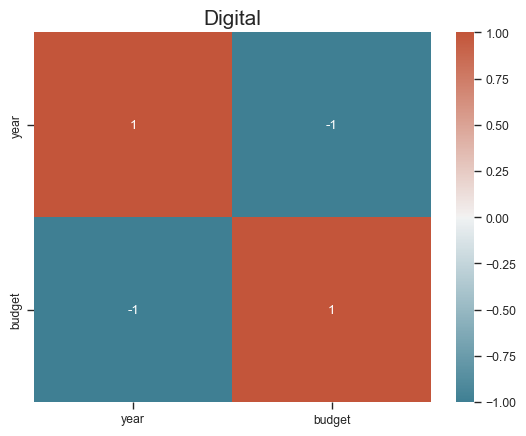

In [6]:
ux = df_clean.query("negative_format=='Digital'") # Plotting the Graph
plt.title("Digital", size=15)
ux = tx.corr()
g=sns.heatmap(ux, xticklabels=ux.columns, yticklabels=ux.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

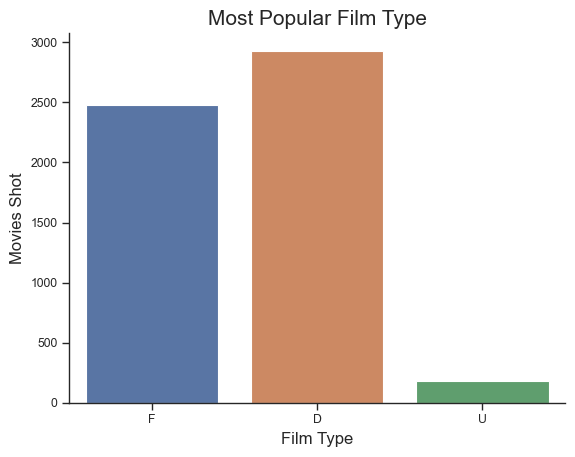

In [7]:
ax = sns.countplot(df_clean, x="film_type")
plt.xlabel("Film Type", size=12)
plt.ylabel("Movies Shot", size=12)
plt.title("Most Popular Film Type", size=15)
plt.show()

With this plot it seems that Digital is utilized more nowadays compared to Film. Though there is only around a ~15% difference between the two, it seems Digital has pulled ahead.

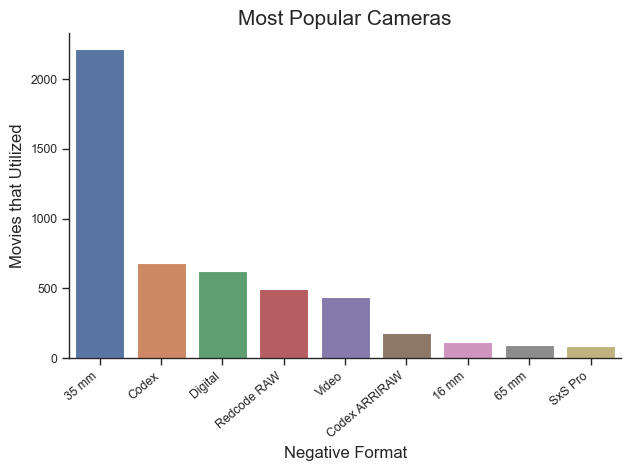

In [8]:
df_p = get_popular_formats(df_clean) # Calling Function to Filter Overplotted Data

# Plotting the Graph
bx = sns.barplot(df_p, x="negative_format", y="count")
bx.set_xticklabels(bx.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Negative Format", size=12)
plt.ylabel("Movies that Utilized", size=12)
plt.title("Most Popular Cameras", size=15)
plt.tight_layout()
plt.show()

Using Method Chaining I made a seperate dateframe to filter out some lesser used formats.
Doing this allowed me to filter out Formats with less than 80 Movies to prevent overplotting graphs.
Although we saw above that Digital was used more than Film, it doesn't seem to line up initially with this graph. This is because there are a large variety of Digital Formats (Codecs) to shoot on versus the fewer sizes of Film (35mm, 65mm, 16mm, etc). So overall it seems that out of Format Type, 35mm is the most prevalent nowadays with Film Size.

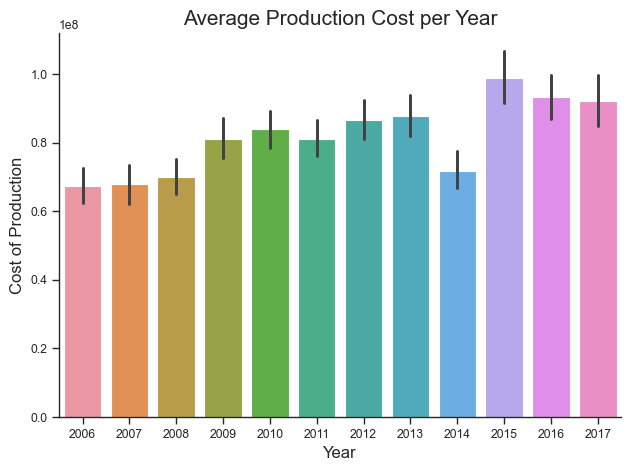

In [9]:
cx = sns.barplot(df_clean, x="year", y="budget") # Plotting the Graph
plt.xlabel("Year", size=12)
plt.ylabel("Cost of Production", size=12)
plt.title("Average Production Cost per Year", size=15)
plt.tight_layout()
plt.show()

Looking at the trend of average production cost, it seems that production costs have gone up. Towards the end it fluxuates between the lowest in 2006 and the highest in 2015. Overall with the increase of higher resolution Digital Formats coming out and the advancement in VFX technology this seems about par. 

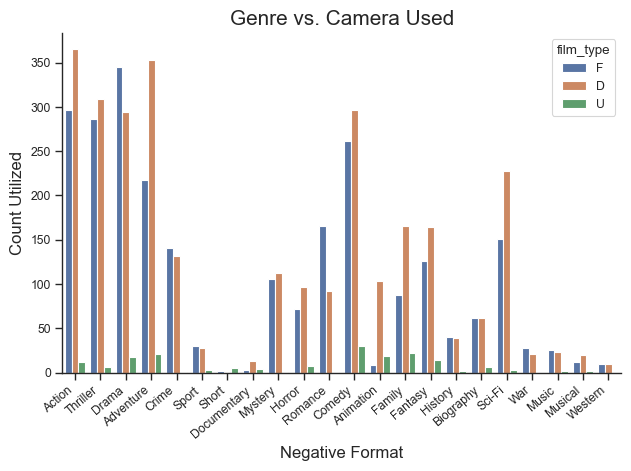

In [10]:
dx = sns.countplot(df_clean, x="genres", hue="film_type") # Plotting the Graph
dx.set_xticklabels(dx.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Negative Format", size=12)
plt.ylabel("Count Utilized", size=12)
plt.title("Genre vs. Camera Used", size=15)
plt.tight_layout()
plt.show()

This is where most of the important data lies as it represents the main use behind the Film Types/Formats. It displays the Film type utilized between different Movie genres in the industry.

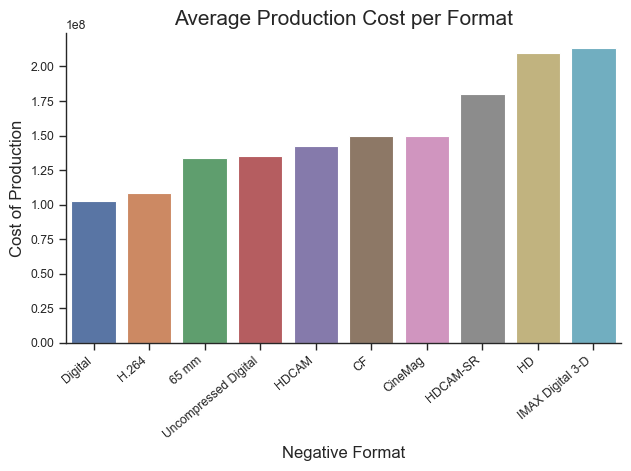

In [11]:
df_d = camera_mean_budget(df_clean) # Import Data Frame

# Plotting the Graph
fx = sns.barplot(df_d, y="budget", x="negative_format", order=df_d.sort_values('budget').negative_format)
fx.set_xticklabels(fx.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Negative Format", size=12)
plt.ylabel("Cost of Production", size=12)
plt.title("Average Production Cost per Format", size=15)
plt.tight_layout()
plt.show()

Based on the cost of most formats, this graph shows that IMAX 3D Movies tend to have the most budget allocated to production.
While Film and other Digital formats tend to have less possibly due to lesser use of VFX or a cheaper cost of the format itself.

### Exporting Data File

In [12]:
df_clean.to_csv('../data/processed/cleaned_analysis1.csv')

## Final Thoughts: 
### Summary: 
Comparing the use of Digital and Film can come down to multiple factors. For the case of my analysis, I went over the use of Format in regard to Genre and further more compared the cost behind those Formats. 

Starting with my first plot, it clear to see that Digital had around a ~15% lead compared to Film. As Digital Technology evolved, it was in the early 2000s onwards had the most advancement. DVDs were beginning to be become more accessible and modernized, storage options were becoming less costly and faster. Computers were becoming smaller and more efficient as well. Those all have an effect on the Movie Industry between the Production and Distribution of a Movie. Digital Cameras themselves are computers with sensors and lenses attached to them. So it would only make sense as those technologies advanced, the Format would become more accessible and soon become cheaper than Film. 

With my second plot, I went over the most used Formats. 35mm came in first place by a long shot but not overall. As I explained below it, there are far more Digital Formats (Codex, Redcode Raw, Codex ARRIRaw, etc…) that have been developed in those years than sizes of Film. Since Film Format is only referenced by the size of the Film (35 mm, 16 mm, 65 mm, etc), the amount of Digital Formats exceed the amount of Film. So overall, Codex seems to be the most popular Digital Format and 35 mm the most popular Film Format.

On my fourth plot, Digital appears to be favoured with more fast paced Movie Genres like (Action, Thriller, Adventure, Sci-Fi, ...), I suspect this comes down to multiple factors. Shooting an Action movie for instance can have stunts that require many diffent point of views of the same scene. Even when it is a one time take, having a Camera that can shoot quick is vital while keeping in mind of the budget. The Format choice is heavily dependant on being able to scale to use multiple cameras at the same time within that budget. As well, it is easier most of the time to work on VFX with Digitally shot codecs. This is because they provide the Artist with more visual and colour data rather than film which is shot as an analog format. 

Coming down to the final plot, it appears that Digital still comes in pretty costly compared to other codecs and film formats. At the top we see IMAX 3D which requires the use of two cameras to shoot simultaniously inorder to achieve a stereoscopic effect. In the lead up to Digital, 65mm appears to be the only Film format on the plot towards the lower cost. 65mm is intended for IMAX viewing so as a format, the size of the Film beats out 35mm and 16mm to meet those requirements. That would require extra cost to producing and sourcing the Film so it makes sense that 65 mm would be on this chart. 

### Conclusion: 
In conclusion, 35mm as an all around Negative Format appears to be the most used when it comes to shooting on Film. The additional budget allocated over the years to productions have allowed Directors to more freely choose which Codec or Film size fits their artistic need. 35mm is relatively inexpensive compared to the bigger budget Films. Along with the other Film sizes (65mm, 35mm, 16mm, …), Film is quite popular with Drama, Romance and Crime with those genres being more story focused. Film use gets quite close to Digital with formats like Action and Thriller but seems to be intended for a more Artistic and Slower Movie.

That being said when it comes to Digital, using the data shown, it is clear to see that Digital Codecs have taken over as the most Popular Film Type. Digital not only has a Low cost bracket but can also hit that Top Bracket too. From being used in lighter productions to big theatrical debuts, Digital is by far the most accessible Format to date. Genres like Action, Adventure, Sci-Fi and Animation have been taken over by Digital Negative Formats. IMAX-3D and similar higher quality codecs have topped the charts for most allocated Production Budget. 

Overall Digital technology keeps evolving as the years go on. Nowadays we have the ability to shoot 8K Footage on some Smartphones. The limitation of lenses not being interchangeable on a Phone is biggest hurtle at the moment. But with AI ever-evolving, upscalling technology could soon relieve that issue. Mobile productions could become quite a popular method for Indie films and in the distant future take over Film completely. Although Film is still quite used in this era, it appears to be in a more artistic sense rather than a practical one. The cost and efficiency of it struggles to compete with Digital but it still provides a feel and look that is hard to replicate. Analog vs Digital might always compete but Digital has been shown to be the Future.
